<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana12/MinimosCuadradosVariasVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI")
!ls

Parcial2    Semana1   Semana11	Semana2  Semana4  Semana6  Semana8
ProyectoML  Semana10  Semana12	Semana3  Semana5  Semana7  Semana9


In [3]:
file = '/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana12/DatosRegresion.csv'
file

'/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI/Semana12/DatosRegresion.csv'

# Supuestos de la regresiòn lineal:

## El modelo de regresiòn lineal està correctamente especìficado y tiene un tèrmino de error.
## El tèrmino de error tiene una media poblaciòn igual a cero.
## Todas la variables explicativas no estàn correlacionadas con el tèrmino de error.
## Las observaciones del termino de error no estas correlacionadas entre si.
## El tèrmino de error tiene varianza constante (homocedàsticidad)

In [4]:
data = pd.read_csv(file)
data.head(100)

,X0,X1,Y
0,5.488135,6.207617,25.523276
1,7.151894,7.460697,32.167177
2,6.027634,10.499409,43.066154
3,5.448832,15.011900,38.069097
4,4.236548,6.670149,21.101511
...,...,...,...
95,1.831914,19.959245,38.381174
96,5.865129,7.243781,28.633805
97,0.201075,9.412979,18.119429
98,8.289400,7.564903,36.207820


from matplotlib import pyplot as plt
_df_0['X0'].plot(kind='hist', bins=20, title='X0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X1', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['X0'].plot(kind='line', figsize=(8, 4), title='X0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
X = np.array(data[['X0','X1']])
Y = np.array(data['Y'])

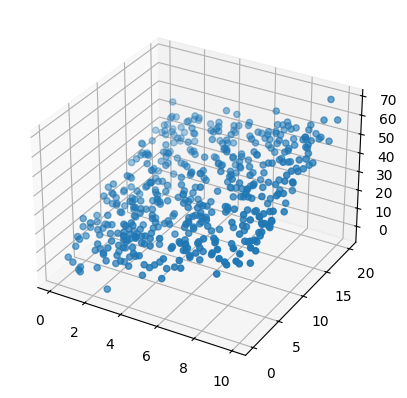

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
XTrain, XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.2)

In [11]:
# Modelo
Model = LinearRegression()
Model.fit(XTrain,YTrain)

LinearRegression()

In [13]:
params = np.array([Model.intercept_,Model.coef_[0],Model.coef_[1]])
params

array([3.55678706, 2.48817553, 1.47830726])

In [14]:
x0 = np.linspace(min(X[:,0]),max(X[:,0]),100)
x1 = np.linspace(min(X[:,1]),max(X[:,1]),100)

In [15]:
X0grid,X1grid = np.meshgrid(x0,x1)
Ygrid = params[0] + params[1]*X0grid + params[2]*X1grid

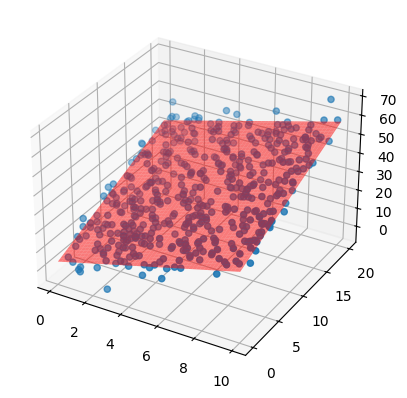

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
ax.plot_surface(X0grid,X1grid,Ygrid,color='r',alpha=0.5)
plt.show()

In [23]:
N = X.shape[0]
n = 3
A = np.ones((N,n))
A[:,1] = X[:,0]
A[:,2] = X[:,1]

b = np.array(Y)

AT = np.dot(A.T,A)
bT = np.dot(A.T,b)

params1 = np.linalg.solve(AT,bT)
params1

array([3.24858768, 2.49270369, 1.50623543])

In [24]:
params

array([3.55678706, 2.48817553, 1.47830726])